In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


Loading the dataset.

In [2]:
data = pd.read_csv('/kaggle/input/lung-cancer/survey lung cancer.csv')

Inspecting the data and checking for missing or categorical values

In [3]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [5]:
data.select_dtypes(include =['object']).columns

Index(['GENDER', 'LUNG_CANCER'], dtype='object')

The columns with categorical values would need to be transformed.

The data would be splitted before the transformation to avoid leakage and only the symptoms of lung cancer would be used to build the model.

In [6]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [7]:
symptoms = ['YELLOW_FINGERS', 'ANXIETY', 'FATIGUE ', 'WHEEZING', 'COUGHING','SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

In [8]:
X = data[symptoms]
y = data.LUNG_CANCER

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state = 42)

Transforming the label to numerical values with LabelEncoder.

In [10]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

Defining the model. The target is a category so this is a classification problem and Random forest classifier would be used.

In [11]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

Fitting the data to the Random Forest model.

In [12]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

Predicting with the Random Forest model.

In [13]:
y_pred = model.predict(X_test)

Evaluating the random forest model.

In [14]:
print('The accuracy score of this Random Forest model is {0:.1f}%'.format(100 *accuracy_score(y_test,y_pred)))

The accuracy score of this Random Forest model is 92.3%


The confusion matrix of this Random Forest model


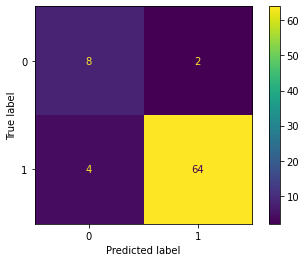

In [15]:
print('The confusion matrix of this Random Forest model')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

The model seems to be good, so the next step is to calculate the features importance.

In [16]:
features_importance = pd.DataFrame({'Symptoms': X.columns, 'Importance':model.feature_importances_}).sort_values('Importance', ascending= False)
features_importance

,Symptoms,Importance
0,YELLOW_FINGERS,0.152723
4,COUGHING,0.150052
7,CHEST PAIN,0.133490
2,FATIGUE,0.124247
3,WHEEZING,0.122971
1,ANXIETY,0.120900
5,SHORTNESS OF BREATH,0.106120
6,SWALLOWING DIFFICULTY,0.089497


A barplot would be made to better understand this.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'YELLOW_FINGERS'),
  Text(1, 0, 'COUGHING'),
  Text(2, 0, 'CHEST PAIN'),
  Text(3, 0, 'FATIGUE '),
  Text(4, 0, 'WHEEZING'),
  Text(5, 0, 'ANXIETY'),
  Text(6, 0, 'SHORTNESS OF BREATH'),
  Text(7, 0, 'SWALLOWING DIFFICULTY')])

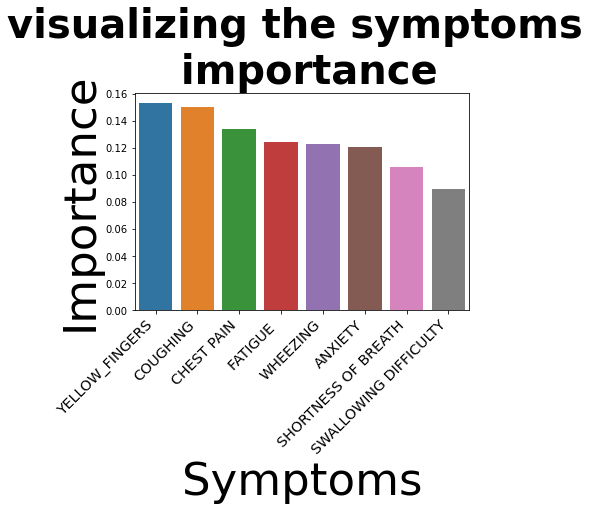

In [17]:
sns.barplot(x= features_importance.Symptoms, y = features_importance.Importance)
plt.rcParams['figure.figsize'] = (15,7)
plt.title('visualizing the symptoms \n importance', fontsize = 40, fontweight = 'bold')
plt.xlabel('Symptoms', fontsize = 45)
plt.ylabel('Importance', fontsize = 45 )
plt.xticks(rotation = 45, horizontalalignment = 'right', fontweight = 'light', fontsize = 'x-large')

From this random forest model, we have been able to show that the most important symptoms for lung cancer are yellow fingers, coughing and chest pain.